# Riddler Classic 

For proper formatting I recommend viewing this notebook using the [nbviewer link](https://nbviewer.jupyter.org/github/Booleans/riddler-538/blob/master/get-a-haircut-already.ipynb).

**2020-02-28**: https://fivethirtyeight.com/features/can-you-get-a-haircut-already/

From Dave Moran comes a question we’ve all faced at some point when waiting in line for a haircut:

At your local barbershop, there are always four barbers working simultaneously. Each haircut takes exactly 15 minutes, and there’s almost always one or more customers waiting their turn on a first-come, first-served basis.

Being a regular, you prefer to get your hair cut by the owner, Tiffany. If one of the other three chairs opens up, and it’s your turn, you’ll say, “No thanks, I’m waiting for Tiffany.” The person behind you in line will then be offered the open chair, and you’ll remain at the front of the line until Tiffany is available.

Unfortunately, you’re not alone in requesting Tiffany — a quarter of the other customers will hold out for Tiffany, while no one will hold out for any of the other barbers.

One Friday morning, you arrive at the barber shop to see that all four barbers are cutting hair, and there is one customer waiting. You have no idea how far along any of the barbers is in their haircuts, and you don’t know whether or not the customer in line will hold out for Tiffany.

What is the expected wait time for getting a haircut from Tiffany?

### Solution

If the person in front of us is waiting for Tiffany (`p=0.25`) then our wait is going to be however much time Tiffany has left in the current hair cut plus the 15 minutes for the next customer's haircut. The time left in the current haircut is uniformly distributed between 0 and 15 minutes, so the expected value is 7.5 minutes. 

If the customer in front of us is not waiting for Tiffany, there is still a `1/4` chance that Tiffany finishes first and that customer gets their hair cut by Tiffany. But in the case that Tiffany is the first of the four barbers to finish we can't just assume that she has 7.5 minutes left on the current cut. 

How many minutes would we expect to be left on the current cut if Tiffany is going to finish first? To do this I used the wikipedia page for order statistics: https://en.wikipedia.org/wiki/Order_statistic

We end up using a Beta distribution, which yields an expected time of `k/(n+1)`, where `k` is the position that Tiffany finishes in, and `n` is the total number of barbers. So if Tiffany finishes 1st, we expect it will take `1/(4+1) = 1/5 * 15 minutes = 3 minutes`. A plot of the distribution is shown below.

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

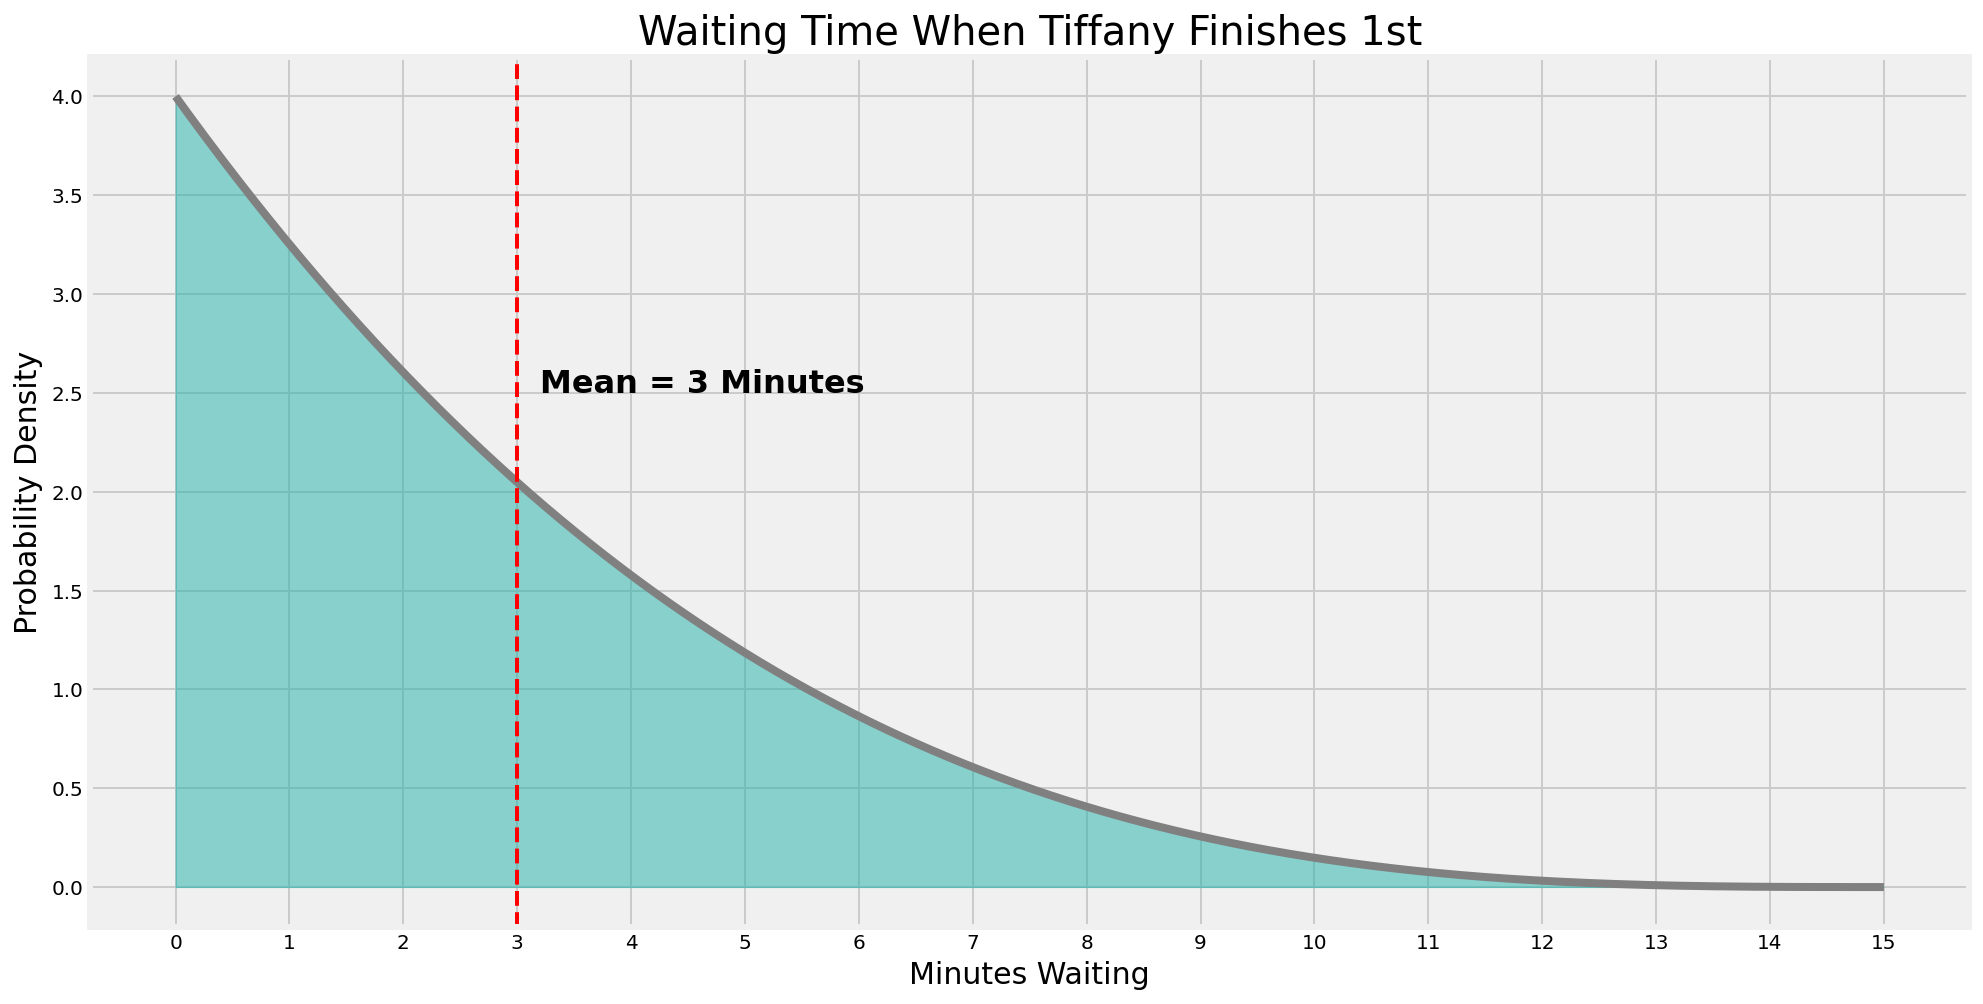

In [2]:
probs = np.linspace(0, 1, 1000)

distribution = stats.beta(a=1, b=4)
densities = distribution.pdf(probs)
fig, ax = plt.subplots(figsize=(15, 8))
plt.xticks(range(0, 16))
ax.text(x=3.2, y=2.5, s='Mean = 3 Minutes', alpha=1.0, color='#000000', fontsize=16, weight='bold')
ax.plot(probs*15, densities, color='grey')
ax.fill_between(probs*15, densities, color='lightseagreen', alpha=.5)
ax.axvline(x=3, color='r', linestyle='dashed', linewidth=2)
ax.set_title('Waiting Time When Tiffany Finishes 1st', fontsize=20)
ax.set_xlabel('Minutes Waiting', fontsize=15)
ax.set_ylabel('Probability Density', fontsize=15);

We can repeat this process for when Tiffany finishes 2nd, 3rd, and 4th.

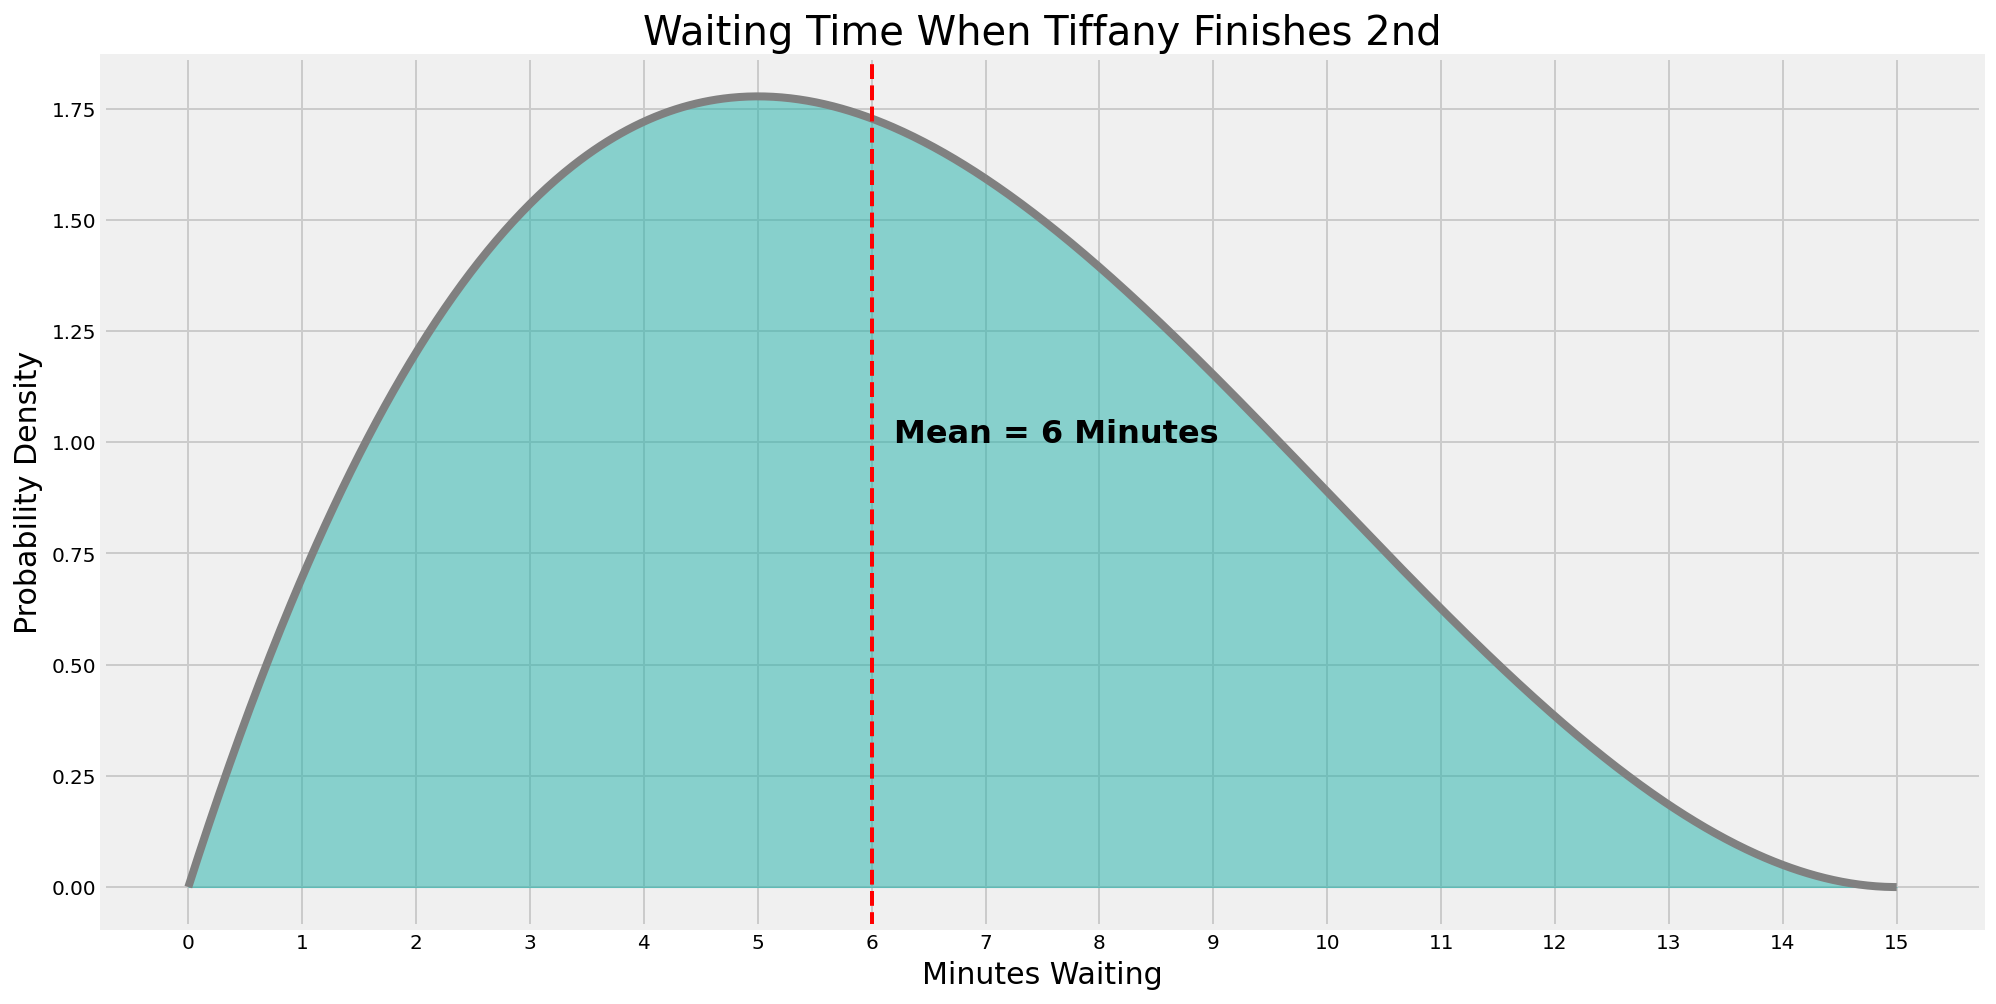

In [3]:
distribution = stats.beta(a=2, b=3)
densities = distribution.pdf(probs)
fig, ax = plt.subplots(figsize=(15, 8))
plt.xticks(range(0, 16))
ax.text(x=6.2, y=1, s='Mean = 6 Minutes', alpha=1.0, color='#000000', fontsize=16, weight='bold')
ax.plot(probs*15, densities, color='grey')
ax.fill_between(probs*15, densities, color='lightseagreen', alpha=.5)
ax.axvline(x=6, color='r', linestyle='dashed', linewidth=2)
ax.set_title('Waiting Time When Tiffany Finishes 2nd', fontsize=20)
ax.set_xlabel('Minutes Waiting', fontsize=15)
ax.set_ylabel('Probability Density', fontsize=15);

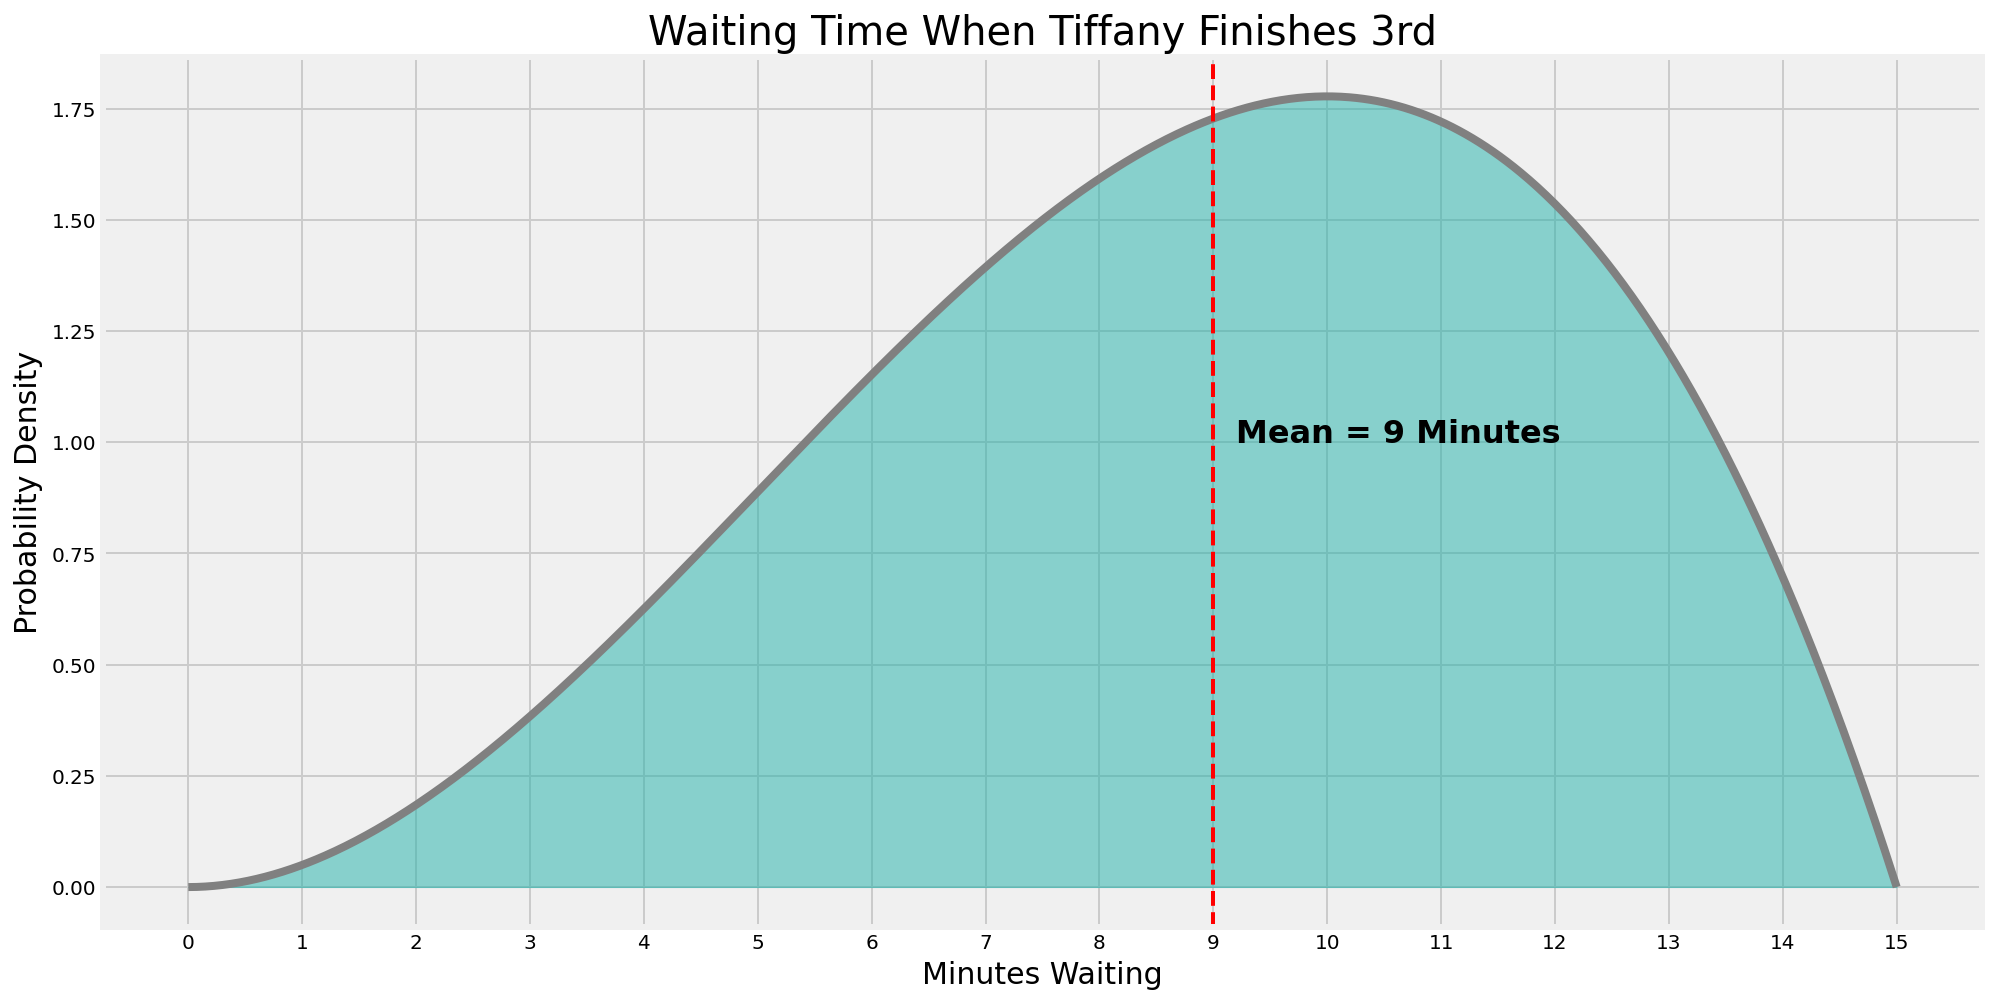

In [4]:
distribution = stats.beta(a=3, b=2)
densities = distribution.pdf(probs)
fig, ax = plt.subplots(figsize=(15, 8))
plt.xticks(range(0, 16))
ax.text(x=9.2, y=1.0, s='Mean = 9 Minutes', alpha=1.0, color='#000000', fontsize=16, weight='bold')
ax.plot(probs*15, densities, color='grey')
ax.fill_between(probs*15, densities, color='lightseagreen', alpha=.5)
ax.axvline(x=9, color='r', linestyle='dashed', linewidth=2)
ax.set_title('Waiting Time When Tiffany Finishes 3rd', fontsize=20)
ax.set_xlabel('Minutes Waiting', fontsize=15)
ax.set_ylabel('Probability Density', fontsize=15);

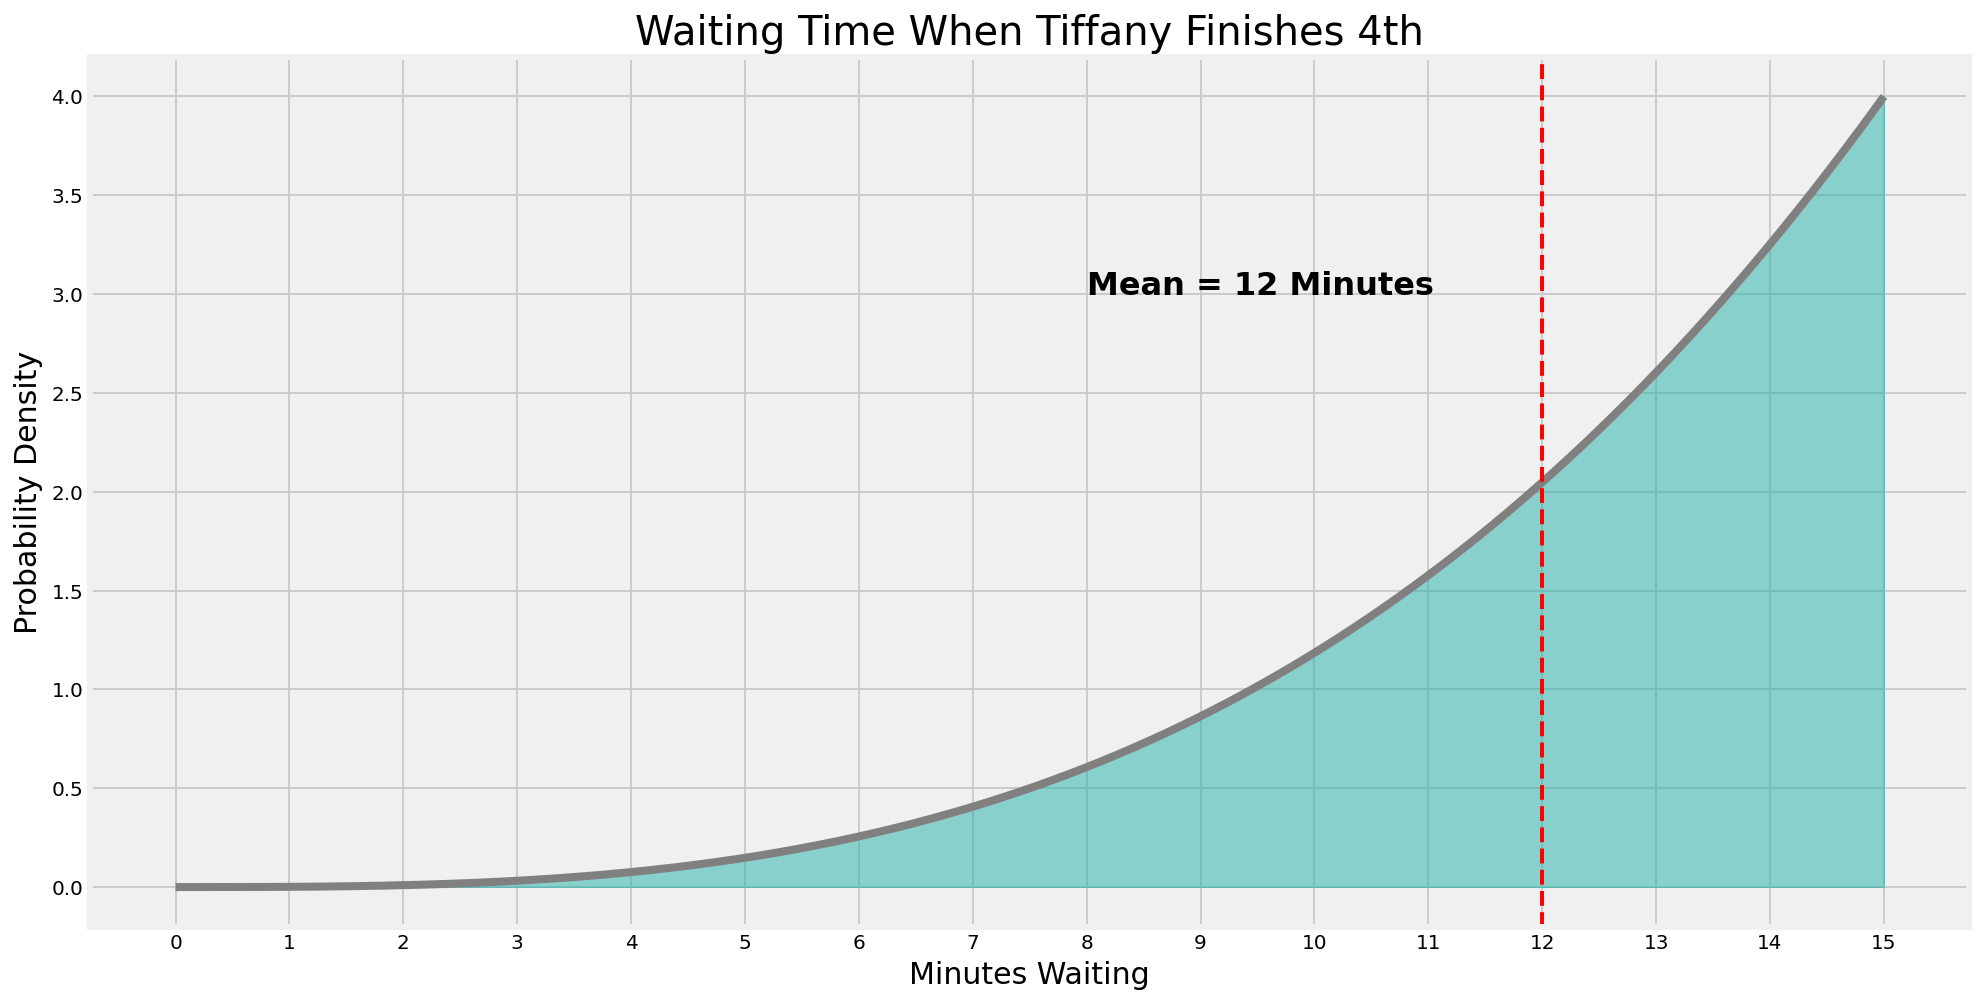

In [5]:
distribution = stats.beta(a=4, b=1)
densities = distribution.pdf(probs)
fig, ax = plt.subplots(figsize=(15, 8))
plt.xticks(range(0, 16))
ax.text(x=8, y=3.0, s='Mean = 12 Minutes', alpha=1.0, color='#000000', fontsize=16, weight='bold')
ax.plot(probs*15, densities, color='grey')
ax.fill_between(probs*15, densities, color='lightseagreen', alpha=.5)
ax.axvline(x=12, color='r', linestyle='dashed', linewidth=2)
ax.set_title('Waiting Time When Tiffany Finishes 4th', fontsize=20)
ax.set_xlabel('Minutes Waiting', fontsize=15)
ax.set_ylabel('Probability Density', fontsize=15);

In summary, here are the scenarios we face:
    
    1. The customer is waiting for Tiffany, we wait for customer's haircut to be done
    2. The customer is not waiting for Tiffany, Tiffany finishes first, we wait for customer's haircut to be done
    3. The customer is not waiting for Tiffany, Tiffany finishes second, we do not wait for the customer's haircut
    4. The customer is not waiting for Tiffany, Tiffany finishes third, we do not wait for the customer's haircut
    5. The customer is not waiting for Tiffany, Tiffany finishes fourth, we do not wait for the customer's haircut
    
 The expected waiting times of each scenario, along with its probability:
 
    1. 7.5+15 = 22.50 minutes, p = 0.25
    2. 3+15 = 18 minutes, p = 0.75*0.25
    3. 6 minutes, p = 0.75*0.25
    4. 9 minutes, p = 0.75*0.25
    5. 12 minutes, p = 0.75*0.25
    
 Multiplying the expected wait times by the probabilities yields:

In [6]:
.25*22.50 + .75*.25*(18+6+9+12)

14.0625

**14.0625 minutes**

#### Simulation

And finally, let's use a simulation to verify that the solution actually is 14.0625 minutes.

In [7]:
total_wait = 0
n_sims = 10**7

# Is the person in front of us waiting for Tiffany or not?
waiting_for_tiffany = np.random.random(size=n_sims) < .25

# The time to wait for each barber. Tiffany is in index 0.
time_remaining = 15*np.random.random(size=(n_sims, 4))
# If Tiffany has the least time remaining then she is the next barber available. 
tiffany_finishes_first = (np.argmin(time_remaining, axis=1)==0)
# If Tiffany finishes first or the first customer is waiting for Tiffany then we have to wait an additional 15 minutes.
# Else, we just have to wait for Tiffany to finish the current hair cut.
wait_times = np.where(tiffany_finishes_first | waiting_for_tiffany, time_remaining[:, 0] + 15, time_remaining[:, 0])

np.mean(wait_times)

14.06227477856164